# Telecommunication Company Churn Analysis-Classification Model
## 1. Business Understanding
- Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.
For instance, if you began the year with 500 customers but later ended with 480 customers, the percentage of customers that left would be 4%. If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives manifold.

- In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

### Business objectives

1. Help the client, a telecommunication company, to understand their data.
2. Find the lifetime value of each customer.
3. Know what factors affect the rate at which customers stop using their network.
4. Predict if a customer will churn or not.

## Hypothesis

Null: is no significant association between churn and contract 
Alternative: There is significant association between churn and contract


## 5 Analystic Question 

1. How does gender impact customer churn? Are there significant differences in churn rates between male and female customers?

2. Does the presence of a partner or dependents influence customer churn? Is there a relationship between marital status and churn behavior?

3. How does the length of tenure affect churn rates? Are customers with longer tenures less likely to churn compared to new customers?


4. What role do additional services (e.g., online security, tech support, streaming TV, etc.) play in reducing customer churn? Are customers with more services less likely to churn?

5. Is there a correlation between the contract term (month-to-month, one year, two years) and churn rates? Are customers on long-term contracts less likely to churn compared to those on month-to-month contracts?


## 2. Data Understanding
### The data for this project is in a csv format. The following describes the columns present in the data.

- Gender -- Whether the customer is a male or a female

- SeniorCitizen -- Whether a customer is a senior citizen or not

- Partner -- Whether the customer has a partner or not (Yes, No)

- Dependents -- Whether the customer has dependents or not (Yes, No)

- Tenure -- Number of months the customer has stayed with the company

- Phone Service -- Whether the customer has a phone service or not (Yes, No)

- MultipleLines -- Whether the customer has multiple lines or not

- InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

- OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

- OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

- DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

- TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

- StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

- StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

- Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

- PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

- Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

- MonthlyCharges -- The amount charged to the customer monthly

- TotalCharges -- The total amount charged to the customer

- Churn -- Whether the customer churned or not (Yes or No)

### Python Libraries
### This section is to import all necessary libraries that will be used in the notebook

In [1]:
pip install python-dotenv


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install -upgrade pyodbc

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install [options] <archive url/path> ...

no such option: -u


In [3]:
pip install openpyxl


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: C:\Users\BENEDICTA MANKATA\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### - Import all the necessary packages

In [7]:
import pyodbc #just installed with pip
from dotenv import dotenv_values #import the dotenv_values function from the dotenv package
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.ensemble import GradientBoostingClassifier
import warnings 
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier,  AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score



warnings.filterwarnings('ignore')

###  - Create your .env file in the root of your project
#### - In the .env file, put all your sensitive information like server name, password etc
####  - Next create a .gitignore file and type '/.env' file we just created. This will prevent git from tracking that file.
####  - Create a connection by accessing your connection string with your defined environment variables

## 3. Data preparation
### 3.1: Data Loading
### This is how the first dataset was retrieved from the SQL Server database. The second and third datasets were downloaded and imported.

In [8]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [9]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

# Data for the Project
First dataset - First 3000 records of the dataset was extracted from Microsoft SQL Server
Second dataset - The second 2000 records of the dataset was downloaded from OneDrive
Third dataset - The third part of the data was downloaded from a GitHub Repository

In [10]:
# Now the sql query to get the data is what what you see below. 


query = "Select * from dbo.LP2_Telco_churn_first_3000"
data = pd.read_sql(query, connection)

## Data Preprocessing
* In the data preprocessing phase, we check the columns, shape, and information on the data to understand its dimensions. 
* We then check for null values in the dataset and impute or remove them depending on the circumstances
* Also we perform a check for duplicaate values and replace them to ensure data integrity

In [11]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [12]:
data2 = pd.read_excel("Telco-churn-second-2000.xlsx")
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [13]:
data3 = pd.read_csv("LP2_Telco-churn-last-2000.csv")
data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [16]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [17]:
data.shape

(3000, 21)

In [18]:
data2.shape

(2000, 20)

In [19]:
data3.shape

(2043, 21)

In [20]:
# Compare the two DataFrames data1 and data2 side-by-side

# Create custom summary DataFrames for each DataFrame
summary_data = pd.DataFrame({'Column Name': data.columns, 'Data Type': data.dtypes, 'Non-Null Count': data.count()})
summary_data3= pd.DataFrame({'Column Name': data3.columns, 'Data Type': data3.dtypes, 'Non-Null Count': data3.count()})

# Set 'Column Name' as the index for both summary DataFrames
summary_data.set_index('Column Name', inplace=True)
summary_data3.set_index('Column Name', inplace=True)

# Concatenate the two summary DataFrames side by side
comparison = pd.concat([summary_data, summary_data3], axis=1, keys=['DataFrame 1', 'DataFrame 2'])

# Print the side-by-side comparison
print(comparison)

                 DataFrame 1                DataFrame 2               
                   Data Type Non-Null Count   Data Type Non-Null Count
Column Name                                                           
customerID            object           3000      object           2043
gender                object           3000      object           2043
SeniorCitizen           bool           3000       int64           2043
Partner                 bool           3000      object           2043
Dependents              bool           3000      object           2043
tenure                 int64           3000       int64           2043
PhoneService            bool           3000      object           2043
MultipleLines         object           2731      object           2043
InternetService       object           3000      object           2043
OnlineSecurity        object           2349      object           2043
OnlineBackup          object           2349      object           2043
Device

From the above, we can see that data2 
Both have the same column names 
There are different data types.
There Dataframe 2 has no missing data. However, data1 shown in Dataframe 1 has some missing data.
There are different datatypes



## Data Preprocessing
* In the data preprocessing phase, we check the columns, shape, and information on the data to understand its dimensions. 
* We then check for null values in the dataset and impute or remove them depending on the circumstances
* Also we perform a check for duplicaate values and replace them to ensure data integrity


# Cleaning column 

# CustomerID

In [21]:
#Preview data 'customerID column

data['customerID'].head()

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
Name: customerID, dtype: object

In [22]:
#Preview data3 'customerID column

data3['customerID'].head()

0    5600-PDUJF
1    8292-TYSPY
2    0567-XRHCU
3    1867-BDVFH
4    2067-QYTCF
Name: customerID, dtype: object

Both 'customerID' columns look good. 
Preview 'gender' column of both data and clean if there are inconsistencies

# Gender 

In [23]:
data['gender'].head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [24]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [25]:
data3['gender'].head()

0      Male
1      Male
2    Female
3      Male
4    Female
Name: gender, dtype: object

In [26]:
data3['gender'].unique()

array(['Male', 'Female'], dtype=object)

The 'gender' column for both data looks clean. 


# SeniorCitizen

From Data Understanding document:
* SeniorCitizen -- Whether a customer is a senior citizen or not

There are no missing data but the datatype is different. data1 is a boolean while data2 is made up of integers

In [27]:
data['SeniorCitizen'].unique()

array([False,  True])

In [28]:
data3['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [29]:
# Convert the binary column to boolean datatype
data3['SeniorCitizen'] = data3['SeniorCitizen'].astype(bool)

In [30]:
data3['SeniorCitizen'].unique()

array([False,  True])

The 'SeniorCitizen' column is clean now.


# Partner 

Convert data2['Partner'] to boolean datatype to reflect Data understanding documentation

* Whether the customer has a partner or not (Yes, No)

In [31]:
data3['Partner'].head()

0     No
1     No
2    Yes
3    Yes
4    Yes
Name: Partner, dtype: object

In [32]:
data['Partner'].head()

0     True
1    False
2    False
3    False
4    False
Name: Partner, dtype: bool

In [33]:
#Replace 'Yes' or 'No' with True or False

data3['Partner'].replace('Yes', True, inplace=True)
data3['Partner'].replace('No', False, inplace=True)
data3['Partner'].head()

0    False
1    False
2     True
3     True
4     True
Name: Partner, dtype: bool

# Dependent 
Convert to reflect readme documentation on data understanding
* Dependents -- Whether the customer has dependents or not (Yes, No)

Check 'Dependent' column of inconsistencies. 

In [34]:
data['Dependents'].head()

0    False
1    False
2    False
3    False
4    False
Name: Dependents, dtype: bool

In [35]:
data['Dependents'].head()

0    False
1    False
2    False
3    False
4    False
Name: Dependents, dtype: bool

In [36]:
data3['Dependents'].head()

0     No
1     No
2    Yes
3    Yes
4     No
Name: Dependents, dtype: object

In [37]:
#Replace 'Yes' or 'No' with True or False

data3['Dependents'].replace('Yes', True, inplace=True)
data3['Dependents'].replace('No', False, inplace=True)
data3['Dependents'].head()

0    False
1    False
2     True
3     True
4    False
Name: Dependents, dtype: bool

# Tenure

In [38]:
data['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [39]:
data3['tenure'].unique()

array([ 6, 19, 69, 11, 64, 39, 15, 25, 66, 61, 43, 12, 23, 71, 34,  5, 41,
       72, 14,  1, 10,  7,  9, 48, 20, 16,  2, 22, 35, 54, 56, 18, 68, 53,
       30, 36, 55, 21, 33, 44,  4, 49, 42, 67, 40, 45, 57,  8, 65,  3, 17,
       28, 52, 47, 50, 46, 29, 27, 13, 24, 62, 26, 60, 51, 70, 59, 38, 37,
        0, 58, 31, 32, 63], dtype=int64)

# PhoneServices
Convert to reflect readme documentation on data understanding

* Phone Service -- Whether the customer has a phone service or not (Yes, No)

In [40]:
data['PhoneService'].head()

0    False
1     True
2     True
3    False
4     True
Name: PhoneService, dtype: bool

In [41]:
data3['PhoneService'].head()

0    Yes
1    Yes
2     No
3    Yes
4    Yes
Name: PhoneService, dtype: object

In [42]:
#Replace 'Yes' or 'No' with True or False

data2['PhoneService'].replace('Yes', True, inplace=True)
data2['PhoneService'].replace('No', False, inplace=True)
data2['PhoneService'].head()

0    True
1    True
2    True
3    True
4    True
Name: PhoneService, dtype: bool

# MultipleLines
data1 has some missing values about 8.9%
impute with mode

In [43]:
#confirm number of missing values

data['MultipleLines'].isnull().sum()

269

In [44]:
data['MultipleLines'].unique()

array([None, False, True], dtype=object)

In [45]:
data['MultipleLines'].value_counts()

MultipleLines
False    1437
True     1294
Name: count, dtype: int64

In [46]:
#impute missing values with mode
mode_multiplelines = data['MultipleLines'].mode()[0]

data['MultipleLines'].fillna(mode_multiplelines, inplace=True)
data['MultipleLines'].isnull().sum()

0

In [47]:
data['MultipleLines'].value_counts()

MultipleLines
False    1706
True     1294
Name: count, dtype: int64

In [48]:
data3['MultipleLines'].unique()

array(['No', 'No phone service', 'Yes'], dtype=object)

In [49]:
data3['MultipleLines'].head()

0                  No
1                  No
2    No phone service
3                 Yes
4                 Yes
Name: MultipleLines, dtype: object

In [50]:
data3['MultipleLines'].value_counts()

MultipleLines
No                  987
Yes                 836
No phone service    220
Name: count, dtype: int64

In [51]:
#we assume that an answer of 'No phone service' is the same as No, since a customer without phone service will have not need for multiplelines

# Replace 'No phone service' with 'No' in the 'MultipleLines' column
data3['MultipleLines'].replace('No phone service', 'No', inplace=True)
data3['MultipleLines'].value_counts()

MultipleLines
No     1207
Yes     836
Name: count, dtype: int64

In [52]:
#confirm number of missing values

data3['MultipleLines'].isnull().sum()

0

In [53]:
data3['MultipleLines'].value_counts()

MultipleLines
No     1207
Yes     836
Name: count, dtype: int64

In [54]:
data3['MultipleLines'].replace('Yes', True, inplace=True)
data3['MultipleLines'].replace('No', False, inplace=True)
data3['MultipleLines'].head()

0    False
1    False
2    False
3     True
4     True
Name: MultipleLines, dtype: bool

In [55]:
data3['MultipleLines'].value_counts()

MultipleLines
False    1207
True      836
Name: count, dtype: int64

In [56]:
data3['MultipleLines'].unique()

array([False,  True])

In [57]:
data['MultipleLines'].unique()

array([False,  True])

# InternetServices

In [58]:
data['InternetService'].isnull().sum()

0

In [59]:
data['InternetService'].nunique()

3

In [60]:
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [61]:
data3['InternetService'].nunique()

3

In [62]:
data['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

'InternetService' column is clean


# OnlineSecurity
OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

In [63]:
data['OnlineSecurity'].unique()

array([False, True, None], dtype=object)

In [64]:


data['OnlineSecurity'].value_counts()

OnlineSecurity
False    1478
True      871
Name: count, dtype: int64

In [65]:
data['OnlineSecurity'].isnull().sum()

651

In [66]:
# We assume the missing data is a response to the third option 'No Internet'. Hence will fill missing with 'No Internet'
# Impute missing values with 'No Internet'.


data['OnlineSecurity'].fillna('No Internet', inplace=True)
data['OnlineSecurity'].value_counts()

OnlineSecurity
False          1478
True            871
No Internet     651
Name: count, dtype: int64

In [67]:

data3['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [68]:
data3['OnlineSecurity'].value_counts()

OnlineSecurity
No                     1029
Yes                     585
No internet service     429
Name: count, dtype: int64

In [69]:
# Replace 'No internet service' with 'No Internet' in the 'MultipleLines' column
data3['OnlineSecurity'].replace('No internet service', 'No Internet', inplace=True)
data3['OnlineSecurity'].value_counts()

OnlineSecurity
No             1029
Yes             585
No Internet     429
Name: count, dtype: int64

# OnlineBackup
* OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

In [70]:
data['OnlineBackup'].isnull().sum()

651

In [71]:
data['OnlineBackup'].unique()

array([True, False, None], dtype=object)

In [72]:
data3['OnlineBackup'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [73]:
# Replace 'False' with 'No' and 'True' with 'Yes' the 'OnlineBackup' column
# Fill missing values with 'No Internet'

data['OnlineBackup'].replace(True, 'Yes', inplace=True)
data['OnlineBackup'].replace(False, 'No', inplace=True)

data['OnlineBackup'].fillna('No Internet', inplace=True)
data['OnlineBackup'].value_counts()

OnlineBackup
No             1320
Yes            1029
No Internet     651
Name: count, dtype: int64

In [74]:

# Replace 'No internet service' with 'No Internet'

data3['OnlineBackup'].replace('No internet service', 'No Internet', inplace=True)
data3['OnlineBackup'].unique()

array(['No', 'Yes', 'No Internet'], dtype=object)

DeviceProtection column
DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

In [75]:

data['DeviceProtection'].unique()

array([False, True, None], dtype=object)

In [76]:
data['DeviceProtection'].isnull().sum()

651

In [77]:
# Replace 'False' with 'No' and 'True' with 'Yes' the 'Deviceprotection' column
# Fill missing values with 'No Internet'

data['DeviceProtection'].replace(True, 'Yes', inplace=True)
data['DeviceProtection'].replace(False, 'No', inplace=True)

data['DeviceProtection'].fillna('No internet service', inplace=True)
data['DeviceProtection'].value_counts()

DeviceProtection
No                     1296
Yes                    1053
No internet service     651
Name: count, dtype: int64

In [78]:
data3['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

# TechSupport
TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

In [79]:
data['TechSupport'].unique()

array([False, True, None], dtype=object)

In [80]:
data['TechSupport'].replace(True, 'Yes', inplace=True)
data['TechSupport'].replace(False, 'No', inplace=True)

data['TechSupport'].fillna('No internet', inplace=True)
data['TechSupport'].value_counts()

TechSupport
No             1476
Yes             873
No internet     651
Name: count, dtype: int64

In [81]:
data['TechSupport'].isnull().sum()

0

In [82]:
data3['TechSupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [83]:
data3['TechSupport'].replace('No internet service', 'No internet', inplace=True)
data3['TechSupport'].unique()

array(['Yes', 'No', 'No internet'], dtype=object)

# StreamingTV column
StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

In [84]:
data['StreamingTV'].unique()

array([False, True, None], dtype=object)

In [85]:
data['StreamingTV'].replace(True, 'Yes', inplace=True)
data['StreamingTV'].replace(False, 'No', inplace=True)

data['StreamingTV'].fillna('No internet service', inplace=True)
data['StreamingTV'].value_counts()

StreamingTV
No                     1190
Yes                    1159
No internet service     651
Name: count, dtype: int64

In [86]:
data3['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

# StreamingMovies column
StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

In [87]:
data['StreamingMovies'].unique()

array([False, True, None], dtype=object)

In [88]:
data3['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [89]:
data['StreamingMovies'].replace(True, 'Yes', inplace=True)
data['StreamingMovies'].replace(False, 'No', inplace=True)

data['StreamingMovies'].fillna('No internet service', inplace=True)
data['StreamingMovies'].value_counts()

StreamingMovies
Yes                    1199
No                     1150
No internet service     651
Name: count, dtype: int64

 # Contract column

In [90]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [91]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

# PaperlessBilling column

* PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

In [92]:
data['PaperlessBilling'].unique()

array([ True, False])

In [93]:
data3['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [94]:
data['PaperlessBilling'].replace(True, 'Yes', inplace=True)
data['PaperlessBilling'].replace(False, 'No', inplace=True)
data['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

# PaymentMethod column

In [95]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [96]:
data3['PaymentMethod'].unique()

array(['Credit card (automatic)', 'Electronic check', 'Mailed check',
       'Bank transfer (automatic)'], dtype=object)

# MonthlyCharges column

In [97]:
data['MonthlyCharges'].head()

0    29.850000
1    56.950001
2    53.849998
3    42.299999
4    70.699997
Name: MonthlyCharges, dtype: float64

In [98]:
#convert to 2 decimal places

data['MonthlyCharges'] = data['MonthlyCharges'].round(2)
data['MonthlyCharges'].head()

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MonthlyCharges, dtype: float64

In [99]:
data3['MonthlyCharges'].head()

0     49.50
1     55.00
2     43.95
3     74.35
4    111.15
Name: MonthlyCharges, dtype: float64

# TotalCharges column

In [100]:
data['TotalCharges'].head()

0      29.850000
1    1889.500000
2     108.150002
3    1840.750000
4     151.649994
Name: TotalCharges, dtype: float64

In [101]:
data['TotalCharges'] = data['TotalCharges'].round(2)
data['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [102]:
data['TotalCharges'].isnull().sum()

5

In [103]:
# Drop rows with any missing values in the TotalCharges column
data.dropna(subset='TotalCharges', inplace=True)
data['TotalCharges'].isnull().sum()

0

In [104]:
data['TotalCharges'].head()

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [105]:
data3['TotalCharges'].head()

0     312.7
1    1046.5
2    2960.1
3     834.2
4    6953.4
Name: TotalCharges, dtype: object

In [106]:
# Convert the TotalCharges column to float datatype
data3['TotalCharges'] = pd.to_numeric(data3['TotalCharges'], errors='coerce').astype(float)

# Round the values to 2 decimal places
data3['TotalCharges'] = data3['TotalCharges'].round(2)
data3['TotalCharges'].head()

0     312.7
1    1046.5
2    2960.1
3     834.2
4    6953.4
Name: TotalCharges, dtype: float64

# Churn column

In [107]:
data['Churn'].isnull().sum()

1

In [108]:
data['Churn'].unique()

array([False, True, None], dtype=object)

In [109]:
# Drop rows with any missing values in the Churn column
data.dropna(subset='Churn', inplace=True)
data['Churn'].isnull().sum()

0

In [110]:
data['Churn'].unique()

array([False, True], dtype=object)

In [111]:
data['Churn'].replace(True, 'Yes', inplace=True)
data['Churn'].replace(False, 'No', inplace=True)
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [112]:
data3['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [113]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   bool   
 3   Partner           2043 non-null   bool   
 4   Dependents        2043 non-null   bool   
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   bool   
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2994 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2994 non-null   object 
 1   gender            2994 non-null   object 
 2   SeniorCitizen     2994 non-null   bool   
 3   Partner           2994 non-null   bool   
 4   Dependents        2994 non-null   bool   
 5   tenure            2994 non-null   int64  
 6   PhoneService      2994 non-null   bool   
 7   MultipleLines     2994 non-null   bool   
 8   InternetService   2994 non-null   object 
 9   OnlineSecurity    2994 non-null   object 
 10  OnlineBackup      2994 non-null   object 
 11  DeviceProtection  2994 non-null   object 
 12  TechSupport       2994 non-null   object 
 13  StreamingTV       2994 non-null   object 
 14  StreamingMovies   2994 non-null   object 
 15  Contract          2994 non-null   object 
 16  PaperlessBilling  2994 non-null   object 
 17  

In [115]:
data.to_csv('clean_data.csv', index=False)
data3.to_csv('clean_data3.csv', index=False)

In [116]:
df_test = data2.to_csv('test.csv',index=False)

In [117]:
df_test = pd.read_csv('test.csv')
#df_test=pd.read_csv(r'C:/Users/user/Desktop/LP2/Telco-Churn-Analysis/Datasets/df_test.csv')

In [118]:
df_test.shape

(2000, 20)

In [119]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   bool   
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [120]:
df_test.drop(columns=['customerID'], inplace=True)

In [121]:
#combine data and data since they are the train dataset
#covert to csv file and store as 'train.csv'

df=pd.concat([data,data3])
df.to_csv('train.csv', index=False)

In [122]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,False,DSL,False,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,False,False,False,45,False,False,DSL,True,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5037 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5037 non-null   object 
 1   gender            5037 non-null   object 
 2   SeniorCitizen     5037 non-null   bool   
 3   Partner           5037 non-null   bool   
 4   Dependents        5037 non-null   bool   
 5   tenure            5037 non-null   int64  
 6   PhoneService      5037 non-null   object 
 7   MultipleLines     5037 non-null   bool   
 8   InternetService   5037 non-null   object 
 9   OnlineSecurity    5037 non-null   object 
 10  OnlineBackup      5037 non-null   object 
 11  DeviceProtection  5037 non-null   object 
 12  TechSupport       5037 non-null   object 
 13  StreamingTV       5037 non-null   object 
 14  StreamingMovies   5037 non-null   object 
 15  Contract          5037 non-null   object 
 16  PaperlessBilling  5037 non-null   object 
 17  

In [124]:
df['TotalCharges'].isnull().sum()

3

In [125]:
#look at the rows with missing values
# Create a boolean mask for rows with missing values
missing_values_mask = df.isnull().any(axis=1)

# Use boolean indexing to filter and display rows with missing values
rows_with_missing_values = df[missing_values_mask]

print(rows_with_missing_values)

      customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
218   2923-ARZLG    Male          False     True        True       0   
1670  4075-WKNIU  Female          False     True        True       0   
1754  2775-SEFEE    Male          False    False        True       0   

     PhoneService  MultipleLines InternetService OnlineSecurity  ...  \
218           Yes          False              No    No Internet  ...   
1670          Yes           True             DSL             No  ...   
1754          Yes           True             DSL            Yes  ...   

         DeviceProtection  TechSupport          StreamingTV  \
218   No internet service  No internet  No internet service   
1670                  Yes          Yes                  Yes   
1754                   No          Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
218   No internet service  One year              Yes   
1670                   No  Two year               No   
1

In [126]:
# Drop rows with any missing values across all columns
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5034 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5034 non-null   object 
 1   gender            5034 non-null   object 
 2   SeniorCitizen     5034 non-null   bool   
 3   Partner           5034 non-null   bool   
 4   Dependents        5034 non-null   bool   
 5   tenure            5034 non-null   int64  
 6   PhoneService      5034 non-null   object 
 7   MultipleLines     5034 non-null   bool   
 8   InternetService   5034 non-null   object 
 9   OnlineSecurity    5034 non-null   object 
 10  OnlineBackup      5034 non-null   object 
 11  DeviceProtection  5034 non-null   object 
 12  TechSupport       5034 non-null   object 
 13  StreamingTV       5034 non-null   object 
 14  StreamingMovies   5034 non-null   object 
 15  Contract          5034 non-null   object 
 16  PaperlessBilling  5034 non-null   object 
 17  

In [127]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,5034.000000,5034.000000,5034.000000
mean,32.620580,65.107251,2300.954758
std,24.511015,30.068019,2268.346401
min,1.000000,18.400000,18.800000
25%,9.000000,35.800000,417.662500
50%,29.000000,70.600000,1401.000000
75%,56.000000,90.050000,3860.600000
max,72.000000,118.650000,8670.100000


In [128]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2038,6840-RESVB,Male,False,True,True,24,Yes,True,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
2039,2234-XADUH,Female,False,True,True,72,Yes,True,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
2040,4801-JZAZL,Female,False,True,True,11,No,False,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,True,True,False,4,Yes,True,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
2042,3186-AJIEK,Male,False,False,False,66,Yes,False,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [129]:
# now that we have confirmed that there are no outliers, lets look at the duplicates
print("Number of duplicates in train dataset:", df.duplicated().sum())

Number of duplicates in train dataset: 0


## Exploratory Data Analysis: EDA

Univariate Analysis

## Frequency Distribution Analysis
This analysis is used to analyze continuous numerical data.

In [130]:
df['MonthlyCharges'].describe()

count    5034.000000
mean       65.107251
std        30.068019
min        18.400000
25%        35.800000
50%        70.600000
75%        90.050000
max       118.650000
Name: MonthlyCharges, dtype: float64

Text(0.5, 1.0, 'Distribution of Monthly Charges')

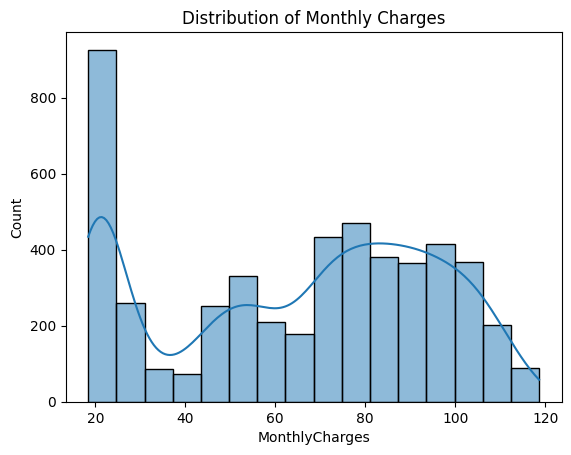

In [131]:
# Create the histogram plot of Monthly charges using seaborn

sns.histplot(data=df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')

TotalCharges column

In [132]:
df['TotalCharges'].describe()

count    5034.000000
mean     2300.954758
std      2268.346401
min        18.800000
25%       417.662500
50%      1401.000000
75%      3860.600000
max      8670.100000
Name: TotalCharges, dtype: float64

Text(0.5, 1.0, 'Distribution of Total Charges')

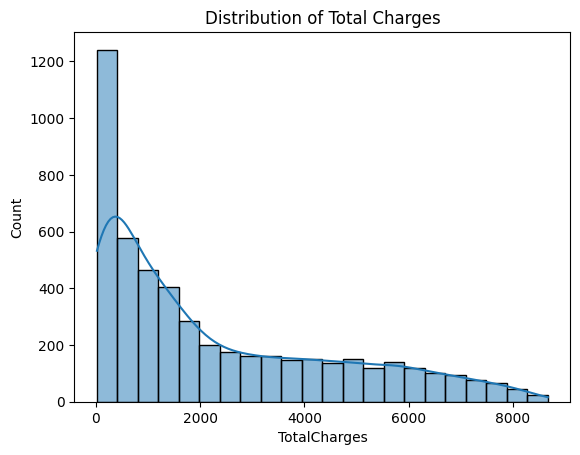

In [133]:
#sns.histplot(data=df['TotalCharges'], kde=True)

# Create the histogram plot using seaborn
sns.histplot(data=df['TotalCharges'], kde=True)
plt.title('Distribution of Total Charges')

The above visualization depicts that charges below 2000 had highest frequency and most charged to the customers of the telecommunications company. The total charged values are skewed and have high variability/range.

Gender

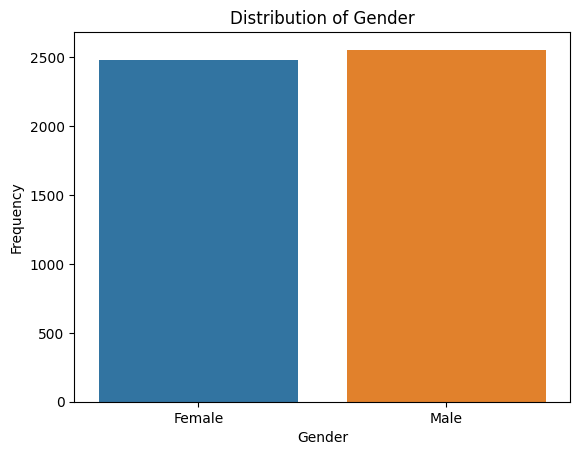

In [134]:
#Plot of Gender Distribution
sns.countplot(x=df['gender'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Distribution of Gender')
plt.show()

Gender distribution is almost even, with Males exceeding females by a very small margin

Payment Method column

In [135]:
# Visualization of Payment Method column

PaymentMethod_Count = df['PaymentMethod'].value_counts().sort_values(ascending=True)
PaymentMethod_Count 

PaymentMethod
Credit card (automatic)      1089
Mailed check                 1123
Bank transfer (automatic)    1123
Electronic check             1699
Name: count, dtype: int64

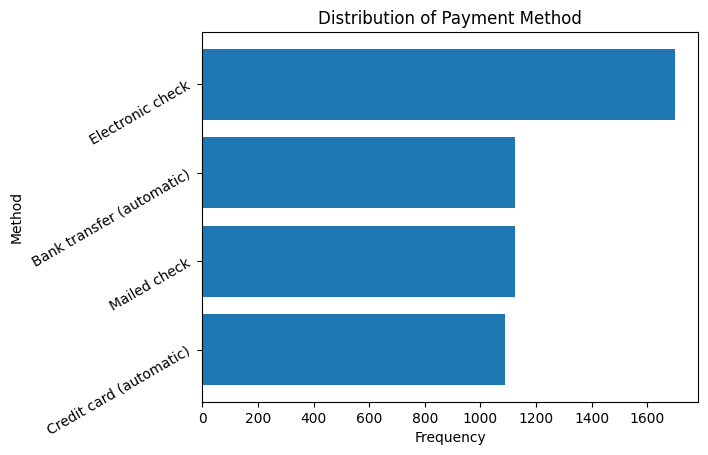

In [136]:
#Use of horizontal bar plot for visualization
#c = ['red', 'blue','yellow','green']
plt.barh(PaymentMethod_Count.index, PaymentMethod_Count.values)
plt.xlabel('Frequency')
plt.ylabel('Method')
plt.title('Distribution of Payment Method')
plt.yticks(rotation=30)
plt.show();

Vizualization shows us that majority of the customers preffered Electronic Check as a method of payment.

 InternetService Column

In [137]:
# Visualization of InternetService column
df['InternetService'].replace('No', 'No Internet Service', inplace=True)

InternetService_Count = df['InternetService'].value_counts().sort_values(ascending=True)
InternetService_Count 

InternetService
No Internet Service    1077
DSL                    1710
Fiber optic            2247
Name: count, dtype: int64

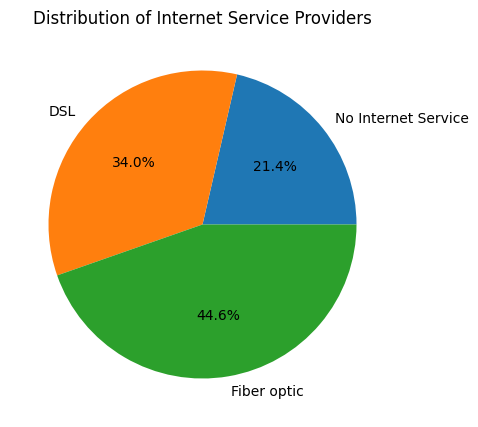

In [138]:
#Plotting a pie chart
#Should discuss with my team what'No' represents

plt.figure(figsize=(5, 5))
plt.pie(InternetService_Count, labels=InternetService_Count.index, autopct='%1.1f%%')
plt.title('Distribution of Internet Service Providers')
plt.show();

Majority of customer's preffered Fibre optic for internet service provision

 #Contract column

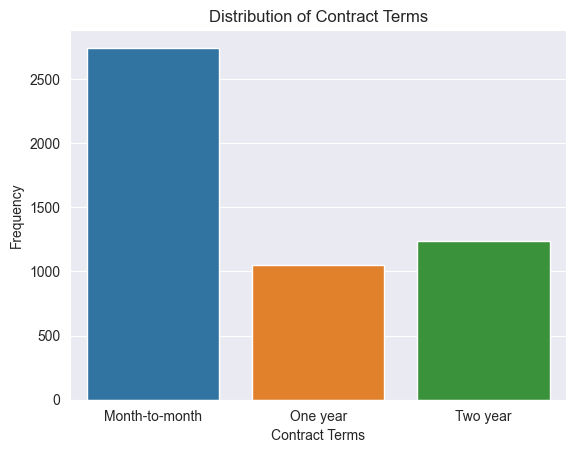

In [139]:
#Use of count plot for visualization
sns.set_style('darkgrid')
sns.countplot(data=df, x='Contract')
plt.xlabel('Contract Terms')
plt.ylabel('Frequency')
plt.title('Distribution of Contract Terms')
#plt.xticks(rotation=25)
plt.show();

# SeniorCitizen

In [140]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
False    4215
True      819
Name: count, dtype: int64

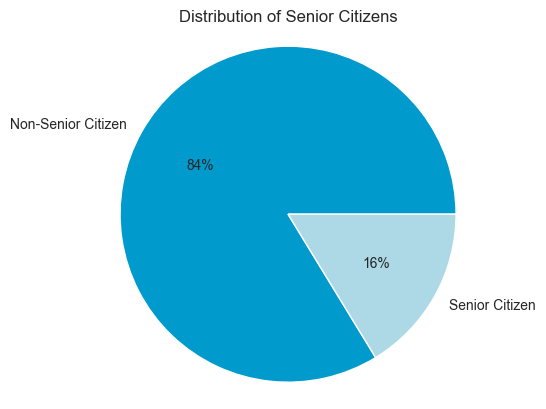

In [141]:
# Count and create pie chart of the 'SeniorCitizen' column

senior_citizen_counts = df['SeniorCitizen'].value_counts()
labels = ['Non-Senior Citizen', 'Senior Citizen']

counts = [senior_citizen_counts[0], senior_citizen_counts[1]]
colors = ['#009ACD', '#ADD8E6']

plt.pie(counts, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False)
plt.axis('equal')

plt.title('Distribution of Senior Citizens')

plt.show()

# Contract

In [142]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

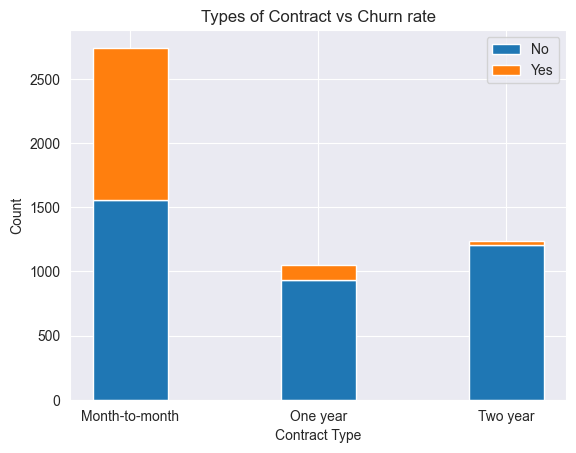

In [143]:
# Grouping and counting occurrences of each combination
grouped_df = df.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
fig, ax = plt.subplots()

index = range(len(grouped_df))
width = 0.4

bars = []
bottom = [0] * len(grouped_df)

for churn_status in grouped_df.columns:
    bar = ax.bar(index, grouped_df[churn_status], width, bottom=bottom, label=churn_status)
    bars.append(bar)
    bottom = [bottom[i] + grouped_df[churn_status][i] for i in range(len(grouped_df))]

ax.set_xlabel('Contract Type')
ax.set_ylabel('Count')
ax.set_title('Types of Contract vs Churn rate')
ax.set_xticks(index)
ax.set_xticklabels(grouped_df.index)
ax.legend()

plt.show()

# 

# Bivariate Analysis 

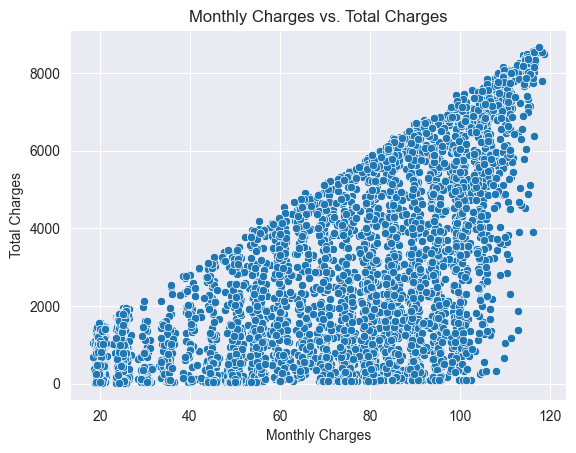

In [144]:
#  Monthly Charges vs. Total Charges
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df)
plt.title('Monthly Charges vs. Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

The scatter plot Show a correlation between "Monthly Charges" and "Total Charges." The points are tightly clustered along a diagonal line from the lower-left to upper-right corner, it indicates a positive correlation.

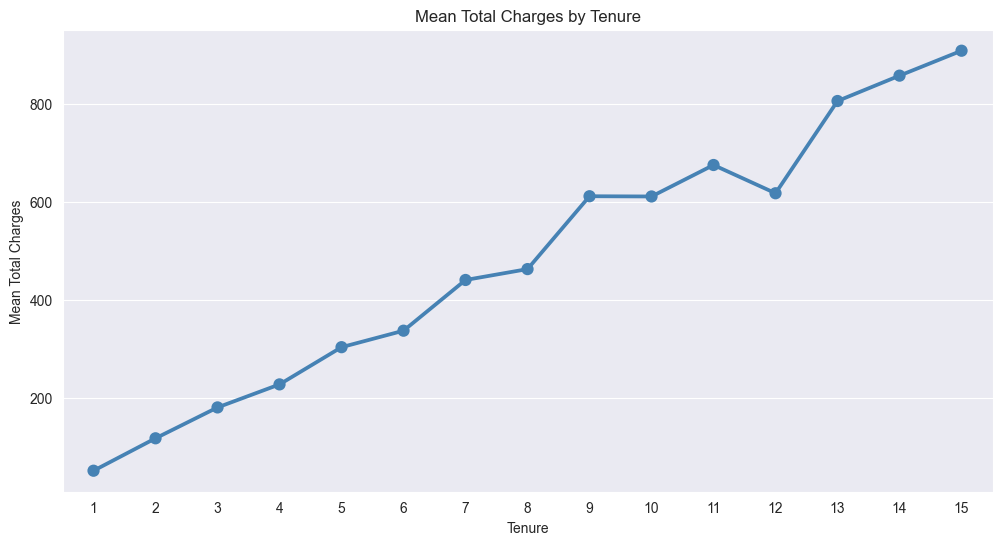

In [145]:
# Grouping by 'tenure' and calculating the mean 'TotalCharges'
df_grp_tenure = df.groupby('tenure')['TotalCharges'].mean().reset_index()

#Top 15 data points
df_grp_tenure_15 = df_grp_tenure.head(15)

# Create a point plot
plt.figure(figsize=(12, 6))
sns.pointplot(data=df_grp_tenure_15, x='tenure', y='TotalCharges', color='steelblue')

# Customize the plot
plt
plt.title('Mean Total Charges by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Mean Total Charges')

# Show the plot
plt.show()

# There is a linear relationship between total charges and tenure. Clients who are loyal and have a long tenure made higher purchases from the most from the telecommunications company.

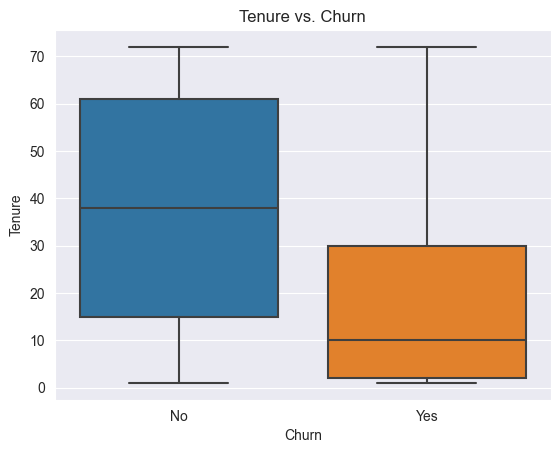

In [146]:
#  Bivariate Analysis - Tenure vs. Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

For each "Churn" category, the box plot shows the spread and central tendency of the "Tenure" values.
Comparing the medians: If the median "Tenure" value for one "Churn" category is significantly higher than the other, it suggests that customers in that category tend to have longer durations of service before churning.
Spread of data: If the boxes have different lengths, it indicates variation in "Tenure" values within each "Churn" category. A shorter box implies less variation.

# Multivariate analysis

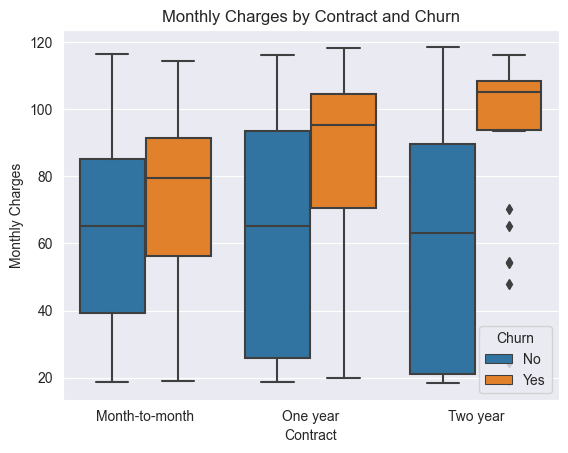

In [147]:
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Monthly Charges by Contract and Churn')
plt.xlabel('Contract')
plt.ylabel('Monthly Charges')
plt.show()







the  box plot that helps  visualize how the monthly charges are distributed across different types of contracts, considering the churn status of customers. The plot provides insights into whether there are significant variations in monthly charges based on contract types and churn behavior

## 1.How does gender impact customer churn? Are there siginificant differences in churn rates between male and female customers?

In [148]:
# Since the  gender column contains 'Male' and 'Female', convert it to categorical data
df['gender'] = pd.Categorical(df['gender'])

In [149]:

# Assuming 'churn' column contains non-numeric values like 'Yes' and 'No'
# Convert 'churn' column to binary numeric values (0 for 'No', 1 for 'Yes')
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
#calculate the chun rates by  gender

Churn_rates_by_gender = df.groupby('gender')['Churn'].mean()

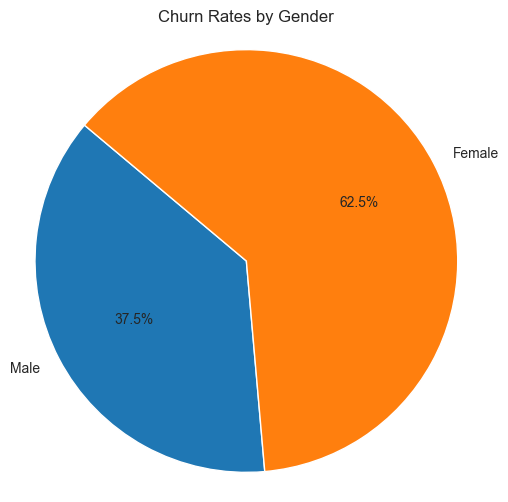

In [150]:
# Assuming you have already calculated the churn rates by gender
churn_rates_by_gender = pd.Series([0.15, 0.25], index=['Male', 'Female'])  # Replace with your actual churn rates

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_rates_by_gender.values, labels=churn_rates_by_gender.index, autopct='%1.1f%%', startangle=140)

plt.title('Churn Rates by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

There was  siginificant differences in churn rates between male and female customers

## 2. Does the presence of a partner or dependents influence customer churn? Is there a relationship between marital status and churn behavior? 

In [151]:
Churn_rates_by_partner = df.groupby('Partner')['Churn'].mean()
Churn_rates_by_dependents = df.groupby('Dependents')['Churn'].mean()

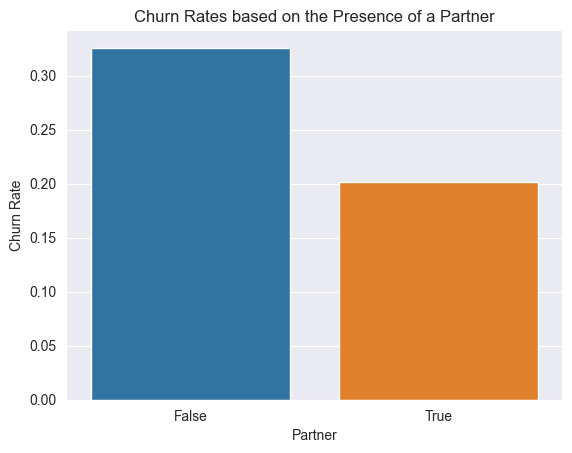

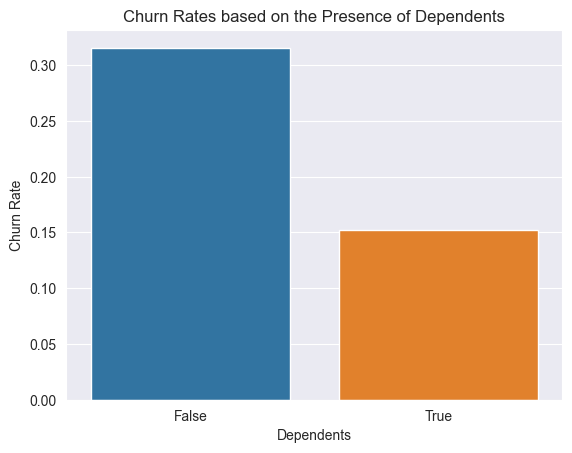

In [152]:
# Plot churn rates based on the presence of a partner
sns.barplot(x=Churn_rates_by_partner.index, y=Churn_rates_by_partner.values)
plt.title('Churn Rates based on the Presence of a Partner')
plt.xlabel('Partner')
plt.ylabel('Churn Rate')
plt.show()

# Plot churn rates based on the presence of dependents
sns.barplot(x=Churn_rates_by_dependents.index, y=Churn_rates_by_dependents.values)
plt.title('Churn Rates based on the Presence of Dependents')
plt.xlabel('Dependents')
plt.ylabel('Churn Rate')
plt.show()







The graph shows that the relationship between partner is higher than the dependents

## 3.How does the length of tenure affect churn rates? Are customers with longer tenures less likely to churn compared to new customers?

In [153]:
# Assuming 'tenure' column contains the length of tenure in months
# Create bins for tenure categories (e.g., 0-6 months, 7-12 months, etc.)
tenure_bins = [0, 6, 12, 24, 36, 48, 60, 1000]  # Adjust the bins as needed
tenure_labels = ['0-6 months', '7-12 months', '13-24 months', '25-36 months', '37-48 months', '49-60 months', '61+ months']
df['tenure_category'] = pd.cut(df['tenure'], bins=tenure_bins, labels=tenure_labels)

# Calculate churn rates for each tenure category
Churn_rates_by_tenure = df.groupby('tenure_category')['Churn'].mean()

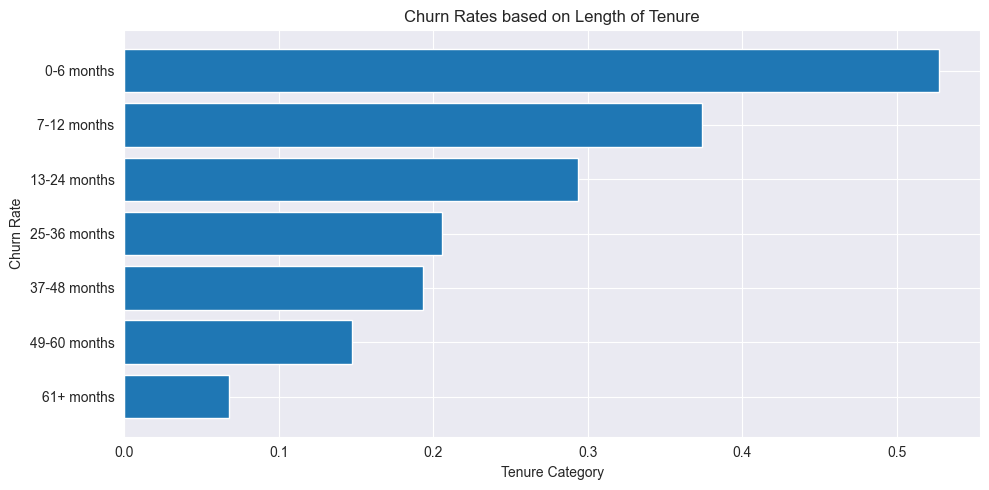

In [154]:
# lets see the distribution of the top 10 investors
plt.figure(figsize=(10, 5))
plt.barh(Churn_rates_by_tenure.index,Churn_rates_by_tenure.values)
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest bar on top


plt.xlabel('Tenure Category')
plt.ylabel('Churn Rate')
plt.title('Churn Rates based on Length of Tenure')
plt.tight_layout()  # To prevent the labels from getting cut off
plt.show();

# The customers with longer tenures is less likely to churn compared to new  customers

## 4. What role do additional services (e.g., online security, tech support, streaming TV, etc.) play in reducing customer churn? Are customers with more services less likely to churn?

In [155]:
# Create bins for service categories (e.g., 0, 1, 2, etc.)
service_bins = [-1, 0, 1]  # Two categories: 0 for "No service", 1 for "Has service"
service_labels = ['No service', 'Has service']
df['OnlineSecurity'] = pd.cut(df['OnlineSecurity'].map({'No internet service':0, 'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)
df['TechSupport'] = pd.cut(df['TechSupport'].map({'No Internet':0, 'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)
df['StreamingTV'] = pd.cut(df['StreamingTV'].map({'No internet service':0, 'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)
df['StreamingMovies'] = pd.cut(df['StreamingMovies'].map({'No internet service':0, 'No internet service':0, 'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)
df['OnlineBackup'] = pd.cut(df['OnlineBackup'].map({'No Internet':0, 'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)
df['DeviceProtection'] = pd.cut(df['DeviceProtection'].map({'No internet service':0, 'No': 0, 'Yes': 1}), bins=service_bins, labels=service_labels)

# Calculate churn rates for each service category
churn_rates_by_OnlineSecurity = df.groupby('OnlineSecurity')['Churn'].mean()
churn_rates_by_TechSupport = df.groupby('TechSupport')['Churn'].mean()
churn_rates_by_StreamingTV = df.groupby('StreamingTV')['Churn'].mean()
churn_rates_by_StreamingMovies = df.groupby('StreamingMovies')['Churn'].mean()
churn_rates_by_OnlineBackup = df.groupby('OnlineBackup')['Churn'].mean()
churn_rates_by_DeviceProtection = df.groupby('DeviceProtection')['Churn'].mean()

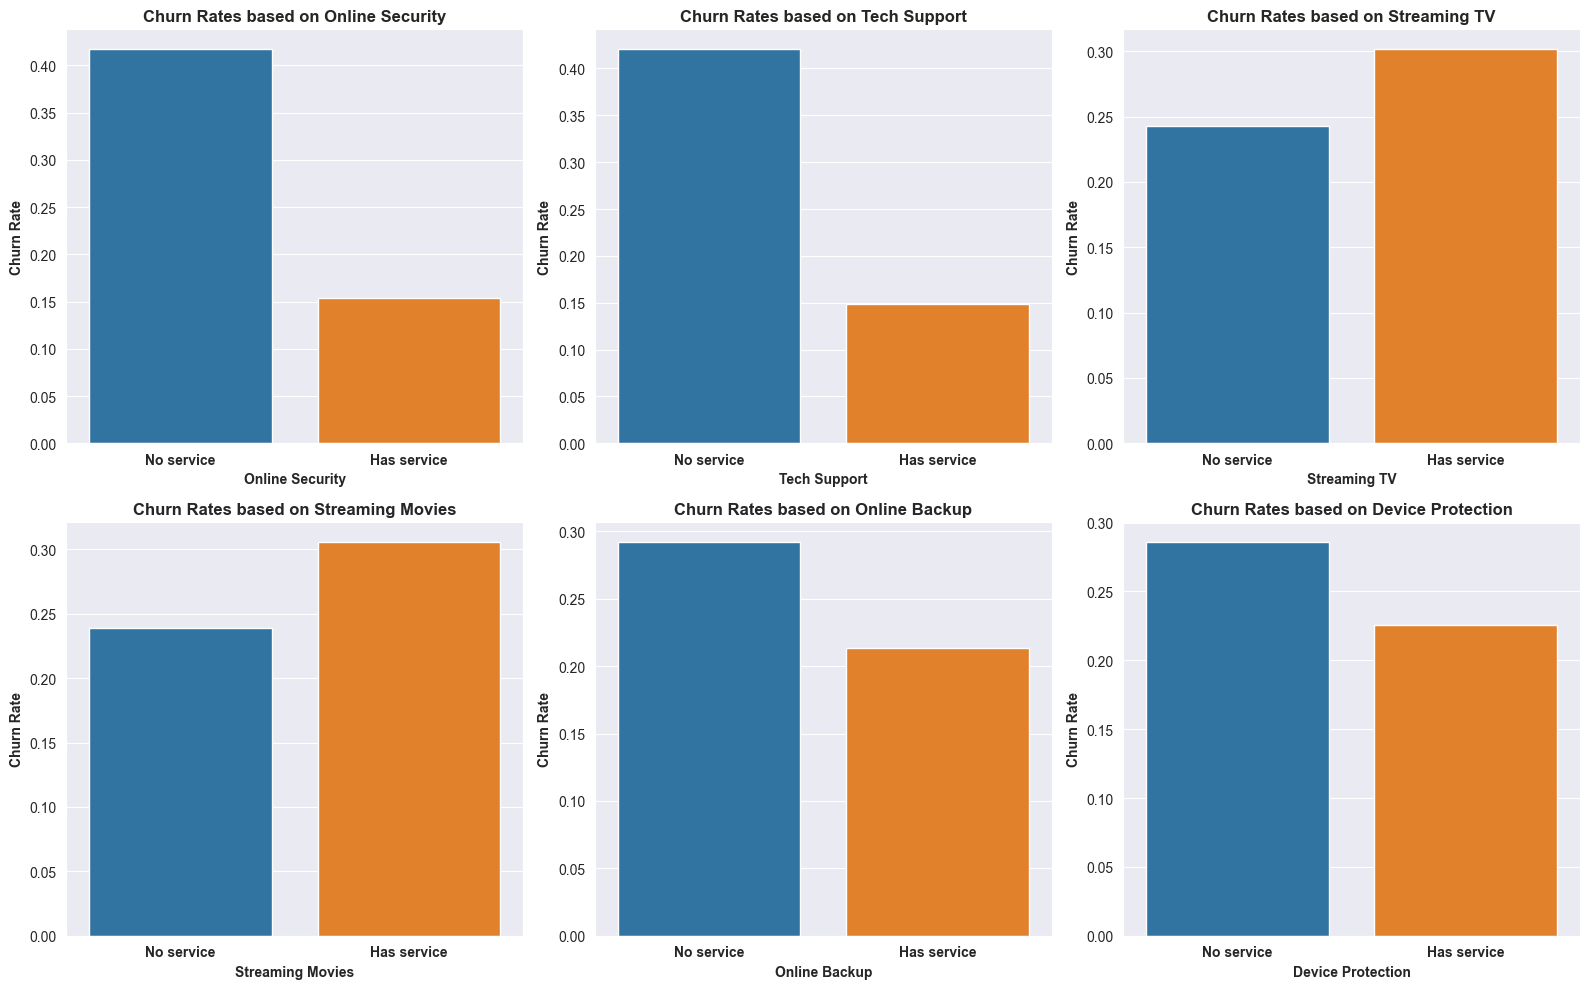

In [156]:
# Plot churn rates for each service
plt.figure(figsize=(16, 10))

plt.subplot(231)
sns.barplot(x=churn_rates_by_OnlineSecurity.index, y=churn_rates_by_OnlineSecurity.values)
plt.title('Churn Rates based on Online Security', weight='bold')
plt.xlabel('Online Security', weight='bold')
plt.ylabel('Churn Rate', weight='bold')
plt.xticks(weight='bold')

plt.subplot(232)
sns.barplot(x=churn_rates_by_TechSupport.index, y=churn_rates_by_TechSupport.values)
plt.title('Churn Rates based on Tech Support', weight='bold')
plt.xlabel('Tech Support', weight='bold')
plt.ylabel('Churn Rate', weight='bold')
plt.xticks(weight='bold')

plt.subplot(233)
sns.barplot(x=churn_rates_by_StreamingTV.index, y=churn_rates_by_StreamingTV.values)
plt.title('Churn Rates based on Streaming TV', weight='bold')
plt.xlabel('Streaming TV', weight='bold')
plt.ylabel('Churn Rate', weight='bold')
plt.xticks(weight='bold')

plt.subplot(234)
sns.barplot(x=churn_rates_by_StreamingMovies.index, y=churn_rates_by_StreamingMovies.values)
plt.title('Churn Rates based on Streaming Movies', weight='bold')
plt.xlabel('Streaming Movies', weight='bold')
plt.ylabel('Churn Rate', weight='bold')
plt.xticks(weight='bold')

plt.subplot(235)
sns.barplot(x=churn_rates_by_OnlineBackup.index, y=churn_rates_by_OnlineBackup.values)
plt.title('Churn Rates based on Online Backup', weight='bold')
plt.xlabel('Online Backup', weight='bold')
plt.ylabel('Churn Rate', weight='bold')
plt.xticks(weight='bold')

plt.subplot(236)
sns.barplot(x=churn_rates_by_DeviceProtection.index, y=churn_rates_by_DeviceProtection.values)
plt.title('Churn Rates based on Device Protection', weight='bold')
plt.xlabel('Device Protection', weight='bold')
plt.ylabel('Churn Rate', weight='bold')
plt.xticks(weight='bold') 

plt.tight_layout()
plt.show()







## According to the graph customers with  services is less likely to churn 

## 5. Is there a correlation between the contract term (month-to-month, one year, two years) and churn rates? Are customers on long-term contracts less likely to churn compared to those on month-to-month contracts?

In [157]:
# Calculate churn rates for each contract term
churn_rates_by_contract = df.groupby('Contract')['Churn'].mean()

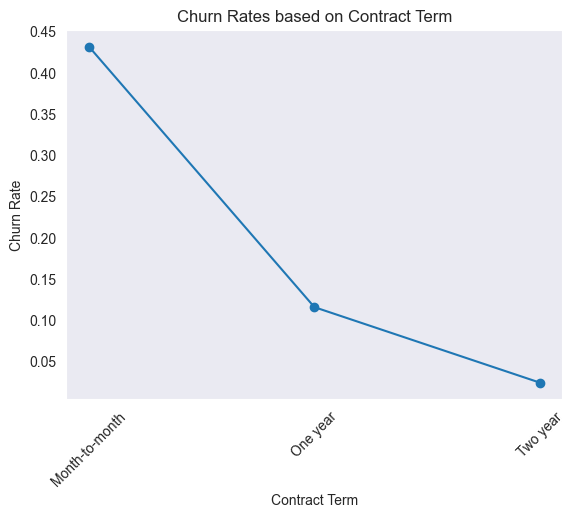

In [158]:
# Sort the data by contract term for a clear line graph
churn_rates_by_contract = churn_rates_by_contract.sort_index()

# Create the line graph
plt.plot(churn_rates_by_contract.index, churn_rates_by_contract.values, marker='o', linestyle='-')
plt.title('Churn Rates based on Contract Term')
plt.xlabel('Contract Term')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)  # To avoid overlapping of labels (optional)
plt.grid(False)  # Add grid lines (optional)
plt.show()

 Customers on long-term contracts is less likely to churn compared to those on month-to-month contracts

In [159]:
df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity      3422
OnlineBackup           0
DeviceProtection       0
TechSupport         1077
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
tenure_category        0
dtype: int64

In [160]:
# Impute missing values with the mode
mode_imputer = df.mode().iloc[0]

# Replace missing values in specific columns
columns_to_impute = ['OnlineSecurity', 'TechSupport']
df[columns_to_impute] = df[columns_to_impute].fillna(mode_imputer)

# Verify that missing values have been imputed
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_category     0
dtype: int64


# checking if our target is balance or imbalance 

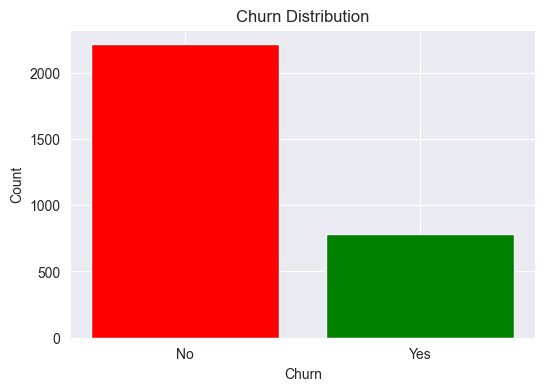

In [161]:
# Check the unique values and their counts in the "Churn" column
churn_counts = data["Churn"].value_counts()

# Visualize the imbalance using a bar plot
plt.figure(figsize=(6, 4))
plt.bar(churn_counts.index, churn_counts.values, color=['red', 'green'])
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Churn Distribution")
plt.show()

# the plot shows that the churn is imbalance 
since there is imbalance we decided to use the reasempling techniques to ensure that the model can learn effectively from both classes(yes and no) and doesnt get biased toward the majority class



### Hypothesis testing

In [162]:
gc=pd.crosstab(df.Contract,df.Churn)
gc

Churn,0,1
Contract,,
Month-to-month,1560,1184
One year,932,122
Two year,1206,30


In [163]:

chi_2,p_value,gol,frequency=chi2_contingency(gc,correction=False)
alpha=0.05
print('level of significance=%.2f,p_value=%.2f,chi_2=%.2f'%(alpha,p_value,chi_2))

level of significance=0.05,p_value=0.00,chi_2=877.93


# convecting Boolean into string in the dataset 

In [164]:
#converting boolean into a string
def convert_to_boolean(df, column):
    def convert_value(value):

        if value == True:

            return "Yes"

        elif value == False:

            return "No"
        else:

            return value

    df[column] = df[column].apply(convert_value)
    return df

In [165]:
# Create a list of categorical variables by excluding numerical columns

cat_variables = df.drop(['customerID','tenure','TotalCharges','MonthlyCharges'], axis=1)
 #Invoke function to convet for all columns in data

for col in cat_variables:

    df = convert_to_boolean(df, col)

In [166]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_category
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No service,...,No service,No service,No service,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-6 months
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,No service,...,No service,No service,No service,One year,No,Mailed check,56.95,1889.50,No,25-36 months
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,No service,...,No service,No service,No service,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-6 months
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,No service,...,Has service,No service,No service,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48 months
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No service,...,No service,No service,No service,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-6 months
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No service,...,No service,Has service,Has service,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,7-12 months
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No service,...,No service,Has service,No service,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,13-24 months
7,6713-OKOMC,Female,No,No,No,10,No,No,DSL,No service,...,No service,No service,No service,Month-to-month,No,Mailed check,29.75,301.90,No,7-12 months
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No service,...,Has service,Has service,Has service,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,25-36 months
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,No service,...,No service,No service,No service,One year,No,Bank transfer (automatic),56.15,3487.95,No,61+ months


In [167]:
df.shape

(5034, 22)

##  Modelling 

### At this stage we start training our data using different models to predict whether a customer will churn or not.
### Some of the models will be testing include:
1. Random Forest Classifier
2. Decision Tree Classifier
3. Ada Boost Classifier
4. Logistic Regression
5. Support Vector Machines (SVM)

# Splitting of the data

In [168]:
#Separation of features and target variable
#features 
X = df.drop(columns=['customerID', 'Churn','tenure_category'])
#target
y = df['Churn']
X_test = df_test

#Split dataset into training and evaluation sets (80% training, 20% evaluation)
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# Print the shapes of the arrays
(X_train.shape, X_eval.shape), (y_train.shape, y_eval.shape), X_test.shape
#X contains the feature columns excluding the predefined
#y contains the target variable 'Churn'
#train_test_split function splits the dataset into training and evaluation test



(((4027, 19), (1007, 19)), ((4027,), (1007,)), (2000, 19))

In [169]:
# lets check if their is any missing value
X_train.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [170]:
X_train.shape

(4027, 19)

In [171]:
y_train.shape

(4027,)

In [172]:
y_train.isna().sum()

0

In [173]:
X_eval.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [174]:
y_eval.isna().sum()

0

In [175]:
X_test.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

## Feature Scaling
### Standardize or normalize numerical features to ensure that they have similar scales. This helps algorithms that rely on distance or magnitude, such as k-nearest neighbors and gradient descent-based methods.

In [176]:
# selecting numerical columns to normalize
num_X_train = X_train.select_dtypes(exclude='object')
num_X_eval = X_eval.select_dtypes(exclude= 'object')
num_X_test = X_test.select_dtypes(exclude= 'object')

In [177]:
print(X_test['TotalCharges'].value_counts())

TotalCharges
20.25     4
19.75     4
69.1      3
19.45     3
          3
         ..
6994.6    1
202.3     1
788.6     1
4475.9    1
301.55    1
Name: count, Length: 1930, dtype: int64


In [178]:
# Define the numeric feature column names
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

X_test['TotalCharges'] = pd.to_numeric(X_test['TotalCharges'], errors='coerce')
imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test[num_features])

In [179]:
stds = StandardScaler()
snum_X_train = pd.DataFrame(stds.fit_transform(X_train[num_features]), columns=num_features, index=X_train.index)
snum_X_eval = pd.DataFrame(stds.transform(X_eval[num_features]), columns=num_features, index=X_eval.index)
snum_X_test = pd.DataFrame(stds.transform(X_test_imputed), columns=num_features, index=X_test.index)

In [180]:
snum_X_train.head(5)

,tenure,MonthlyCharges,TotalCharges
581,1.444677,1.597538,2.457884
1819,1.158312,-0.458791,0.416487
423,0.462853,-1.312268,-0.528117
1491,-1.296247,-1.516902,-1.011043
1143,0.708309,-1.490283,-0.604056


In [181]:
snum_X_eval.head()

,tenure,MonthlyCharges,TotalCharges
1106,-1.255338,-0.334014,-0.969521
1362,-1.173520,0.168423,-0.914365
2162,-0.191696,1.046854,0.168572
926,-1.091701,0.449587,-0.805757
396,0.094669,-1.498602,-0.734399


In [182]:
print(X_train.shape)
print(y_train.shape)
print(X_eval.shape)
print(y_eval.shape)

(4027, 19)
(4027,)
(1007, 19)
(1007,)


# Encoding 

In [183]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4027 entries, 581 to 491
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            4027 non-null   category
 1   SeniorCitizen     4027 non-null   object  
 2   Partner           4027 non-null   object  
 3   Dependents        4027 non-null   object  
 4   tenure            4027 non-null   int64   
 5   PhoneService      4027 non-null   object  
 6   MultipleLines     4027 non-null   object  
 7   InternetService   4027 non-null   object  
 8   OnlineSecurity    4027 non-null   category
 9   OnlineBackup      4027 non-null   category
 10  DeviceProtection  4027 non-null   category
 11  TechSupport       4027 non-null   category
 12  StreamingTV       4027 non-null   category
 13  StreamingMovies   4027 non-null   category
 14  Contract          4027 non-null   object  
 15  PaperlessBilling  4027 non-null   object  
 16  PaymentMethod     4027 non-n

In [184]:
# Convert categorical variables into binary columns (0 or 1) for each category
cat_X_train = X_train.select_dtypes(include='object')
cat_X_eval = X_eval.select_dtypes(include='object')
cat_X_test = X_test.select_dtypes(include='object')

In [185]:
# Initialize OneHotEncoder
enc = OneHotEncoder()

# Fit and transform the categorical features
encoded_features = enc.fit_transform(cat_X_train)

# Get the feature names after encoding
feature_names = enc.get_feature_names_out(input_features=cat_X_train.columns)

# Convert the encoded features back to a DataFrame with appropriate column names
tcat_X_train = pd.DataFrame(encoded_features.toarray(), index=cat_X_train.index, columns=feature_names)

# Display the resulting DataFrame
print(tcat_X_train)

      SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
581                1.0                0.0         0.0          1.0   
1819               1.0                0.0         0.0          1.0   
423                1.0                0.0         0.0          1.0   
1491               1.0                0.0         1.0          0.0   
1143               1.0                0.0         0.0          1.0   
...                ...                ...         ...          ...   
215                1.0                0.0         0.0          1.0   
4                  1.0                0.0         1.0          0.0   
400                1.0                0.0         1.0          0.0   
1277               1.0                0.0         0.0          1.0   
491                1.0                0.0         1.0          0.0   

      Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
581             0.0             1.0              0.0               1.0   
1819       

In [186]:
tcat_X_train.head()

,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,...,InternetService_No Internet Service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
581,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1819,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
423,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1491,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1143,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [187]:
# Initialize OneHotEncoder
enc = OneHotEncoder()

# Fit and transform the categorical features
encoded_features = enc.fit_transform(cat_X_test)

# Get the feature names after encoding
feature_names = enc.get_feature_names_out(input_features=cat_X_test.columns)

# Convert the encoded features back to a DataFrame with appropriate column names
tcat_X_test = pd.DataFrame(encoded_features.toarray(), index=cat_X_test.index, columns=feature_names)

# Display the resulting DataFrame
print(tcat_X_test)

      gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  \
0               0.0          1.0         1.0          0.0            1.0   
1               0.0          1.0         1.0          0.0            1.0   
2               0.0          1.0         1.0          0.0            1.0   
3               0.0          1.0         1.0          0.0            0.0   
4               0.0          1.0         0.0          1.0            0.0   
...             ...          ...         ...          ...            ...   
1995            1.0          0.0         1.0          0.0            1.0   
1996            1.0          0.0         1.0          0.0            1.0   
1997            0.0          1.0         1.0          0.0            1.0   
1998            0.0          1.0         1.0          0.0            1.0   
1999            1.0          0.0         0.0          1.0            0.0   

      Dependents_Yes  MultipleLines_No  MultipleLines_No phone service  \
0            

In [188]:
tcat_X_test.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [189]:
# Initialize OneHotEncoder
enc = OneHotEncoder()

# Fit and transform the categorical features
encoded_features = enc.fit_transform(cat_X_eval)

# Get the feature names after encoding
feature_names = enc.get_feature_names_out(input_features=cat_X_eval.columns)

# Convert the encoded features back to a DataFrame with appropriate column names
tcat_X_eval = pd.DataFrame(encoded_features.toarray(), index=cat_X_eval.index, columns=feature_names)

# Display the resulting DataFrame
print(tcat_X_eval)

      SeniorCitizen_No  SeniorCitizen_Yes  Partner_No  Partner_Yes  \
1106               1.0                0.0         1.0          0.0   
1362               1.0                0.0         1.0          0.0   
2162               1.0                0.0         0.0          1.0   
926                1.0                0.0         1.0          0.0   
396                1.0                0.0         1.0          0.0   
...                ...                ...         ...          ...   
2109               1.0                0.0         1.0          0.0   
2071               1.0                0.0         0.0          1.0   
835                0.0                1.0         0.0          1.0   
858                1.0                0.0         1.0          0.0   
1405               1.0                0.0         1.0          0.0   

      Dependents_No  Dependents_Yes  PhoneService_No  PhoneService_Yes  \
1106            1.0             0.0              0.0               1.0   
1362       

In [190]:
tcat_X_eval.head()

,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,...,InternetService_No Internet Service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1106,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1362,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2162,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
926,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
396,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [191]:
final_X_train = pd.concat([snum_X_train, tcat_X_train], axis=1)
final_X_eval = pd.concat([snum_X_eval,tcat_X_eval], axis=1)
final_X_test = pd.concat([snum_X_test,tcat_X_test], axis=1)


In [192]:
final_X_train.shape

(4027, 25)

In [193]:
final_X_eval.shape

(1007, 25)

In [194]:
y_eval.shape

(1007,)

In [195]:
y_train.shape

(4027,)

In [196]:
final_X_test.shape

(2000, 42)

In [197]:
final_X_train.head(5)

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,InternetService_No Internet Service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
581,1.444677,1.597538,2.457884,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1819,1.158312,-0.458791,0.416487,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
423,0.462853,-1.312268,-0.528117,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1491,-1.296247,-1.516902,-1.011043,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1143,0.708309,-1.490283,-0.604056,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [198]:
final_X_eval.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,InternetService_No Internet Service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1106,-1.255338,-0.334014,-0.969521,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1362,-1.173520,0.168423,-0.914365,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2162,-0.191696,1.046854,0.168572,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
926,-1.091701,0.449587,-0.805757,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
396,0.094669,-1.498602,-0.734399,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [199]:
final_X_test.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.846245,0.642576,-0.550671,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.968973,-1.488619,-0.939221,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.232605,0.551073,-0.040277,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.232605,0.477870,-0.054443,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.296247,0.798964,-0.980234,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Model Training

### here we create instances of different models (Logistic Regression, Random Forest, Decision Tree, Ada Boost and Support Vector Classifier) and add them to the models dictionary. Then, we loop through each model, train it on our training data, evaluate it on your evaluation data, and print their evaluation metrics, which include accuracy, precision, recall, F1 score and Roc auc scores.

In [200]:
# lets create a function to loop through all the models
# defining a list to host all the classifiers we will use for training
classifiers= [
RandomForestClassifier(random_state=42),
DecisionTreeClassifier(random_state=42),
AdaBoostClassifier(random_state=42),
LogisticRegression(random_state=42),
GradientBoostingClassifier(random_state=42),

]

# creating empty dictionaries to store the models and evaluation metrics
trained_models=[]
models = {}
accuracies = {}
precisions = {}
recalls = {}
f1_scores = {}





In [201]:
# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
ada_model = AdaBoostClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)
gb_model= GradientBoostingClassifier(random_state=42)

In [202]:
# Train the models
rf_model.fit(final_X_train,y_train)
dt_model.fit(final_X_train, y_train)
ada_model.fit(final_X_train, y_train)
lr_model.fit(final_X_train, y_train)
gb_model.fit(final_X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [203]:
# Calculate predicted probabilities for each classifier
rf_pred_proba = rf_model.predict_proba(final_X_eval)[:, 1]
dt_pred_proba = dt_model.predict_proba(final_X_eval)[:, 1]
ada_pred_proba = ada_model.predict_proba(final_X_eval)[:, 1]
lr_pred_proba = lr_model.predict_proba(final_X_eval)[:, 1]
gb_pred_proba = gb_model.predict_proba(final_X_eval)[:, 1]

In [204]:
# Calculate ROC-AUC scores
rf_roc_auc = roc_auc_score(y_eval, rf_pred_proba)
dt_roc_auc = roc_auc_score(y_eval, dt_pred_proba)
ada_roc_auc = roc_auc_score(y_eval, ada_pred_proba)
lr_roc_auc = roc_auc_score(y_eval, lr_pred_proba)
gb_roc_auc = roc_auc_score(y_eval, gb_pred_proba)

In [205]:
# Predictions for each classifier
rf_pred = rf_model.predict(final_X_eval)
dt_pred = dt_model.predict(final_X_eval)
ada_pred = ada_model.predict(final_X_eval)
lr_pred = lr_model.predict(final_X_eval)
gb_pred = gb_model.predict(final_X_eval)
# Calculate evaluation metrics for Random Forest classifier
rf_accuracy = accuracy_score(y_eval, rf_pred)
rf_precision = precision_score(y_eval, rf_pred, pos_label='Yes')
rf_recall = recall_score(y_eval, rf_pred, pos_label='Yes')
rf_f1 = f1_score(y_eval, rf_pred, pos_label='Yes')

# Calculate evaluation metrics for Decision Tree classifier
dt_accuracy = accuracy_score(y_eval, dt_pred)
dt_precision = precision_score(y_eval, dt_pred, pos_label='Yes')
dt_recall = recall_score(y_eval, dt_pred, pos_label='Yes')
dt_f1 = f1_score(y_eval, dt_pred, pos_label='Yes')

# Calculate evaluation metrics for AdaBoostClassifier predictions
ada_accuracy = accuracy_score(y_eval, dt_pred)
ada_precision = precision_score(y_eval, dt_pred, pos_label='Yes')
ada_recall = recall_score(y_eval, dt_pred, pos_label='Yes')
ada_f1 = f1_score(y_eval, dt_pred, pos_label='Yes')

# Calculate evaluation metrics for LogisticRegression predictions
lr_accuracy = accuracy_score(y_eval, dt_pred)
lr_precision = precision_score(y_eval, dt_pred, pos_label='Yes')
lr_recall = recall_score(y_eval, dt_pred, pos_label='Yes')
lr_f1 = f1_score(y_eval, dt_pred, pos_label='Yes')


# Calculate evaluation metrics for GradientBoostingClassifier predictions
gb_accuracy = accuracy_score(y_eval, dt_pred)
gb_precision = precision_score(y_eval, dt_pred, pos_label='Yes')
gb_recall = recall_score(y_eval, dt_pred, pos_label='Yes')
gb_f1 = f1_score(y_eval, dt_pred, pos_label='Yes')

# Print the evaluation metrics for each classifier

print("Random Forest:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("ROC-AUC Score:", rf_roc_auc)
print("F1-Score:", rf_f1)

print()

print("Decision Tree Classifier:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("ROC-AUC Score:", dt_roc_auc)
print("F1-Score:", dt_f1)

print()

print("AdaBoost Classifier:", ada_accuracy)
print("Precision:", ada_precision)
print("Recall:", ada_recall)
print("ROC-AUC Score:", ada_roc_auc)
print("F1-Score:", ada_f1)

print()

print("Logistic Regression:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("ROC-AUC Score:", lr_roc_auc)
print("F1-Score:", lr_f1)

print()

print("Gradient Boosting Classifier:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("ROC-AUC Score:", dt_roc_auc)
print("F1-Score:", gb_f1)

Random Forest: 0.8003972194637538
Precision: 0.6527777777777778
Recall: 0.5280898876404494
ROC-AUC Score: 0.8349023180483854
F1-Score: 0.5838509316770185

Decision Tree Classifier: 0.7120158887785502
Precision: 0.4612794612794613
Recall: 0.5131086142322098
ROC-AUC Score: 0.6539933191618585
F1-Score: 0.48581560283687947

AdaBoost Classifier: 0.7120158887785502
Precision: 0.4612794612794613
Recall: 0.5131086142322098
ROC-AUC Score: 0.8583029658872355
F1-Score: 0.48581560283687947

Logistic Regression: 0.7120158887785502
Precision: 0.4612794612794613
Recall: 0.5131086142322098
ROC-AUC Score: 0.8574678611195465
F1-Score: 0.48581560283687947

Gradient Boosting Classifier: 0.7120158887785502
Precision: 0.4612794612794613
Recall: 0.5131086142322098
ROC-AUC Score: 0.6539933191618585
F1-Score: 0.48581560283687947


#Confusion Matrix 

Confusion Matrix:
we can create a confusion matrix to visualize the classification results and further analyze the performance of our model:

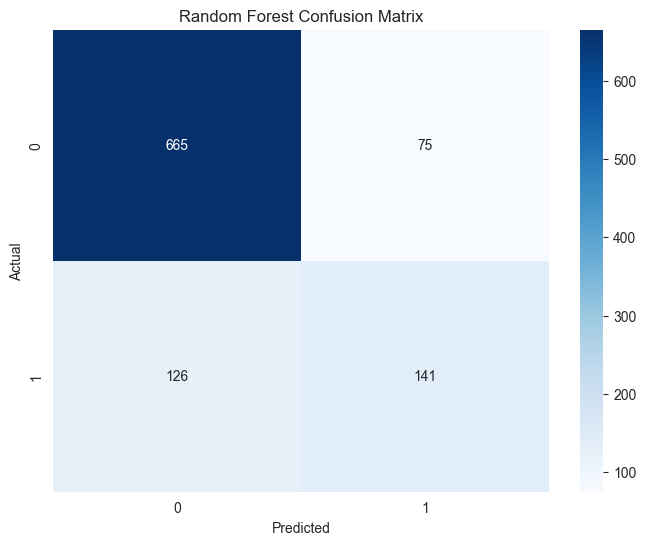

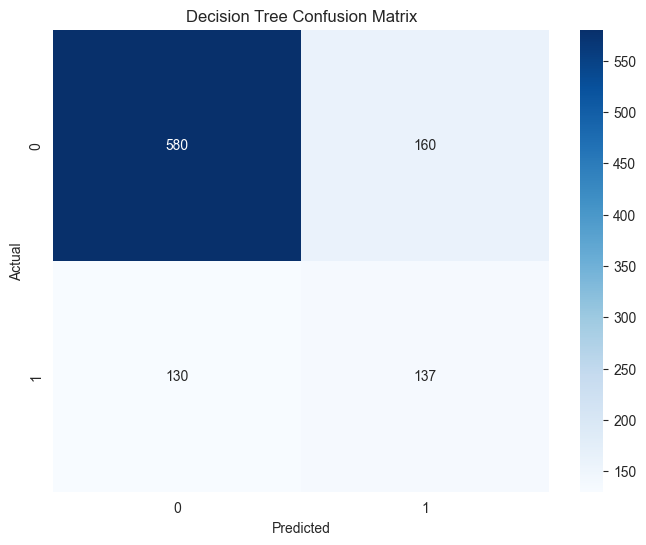

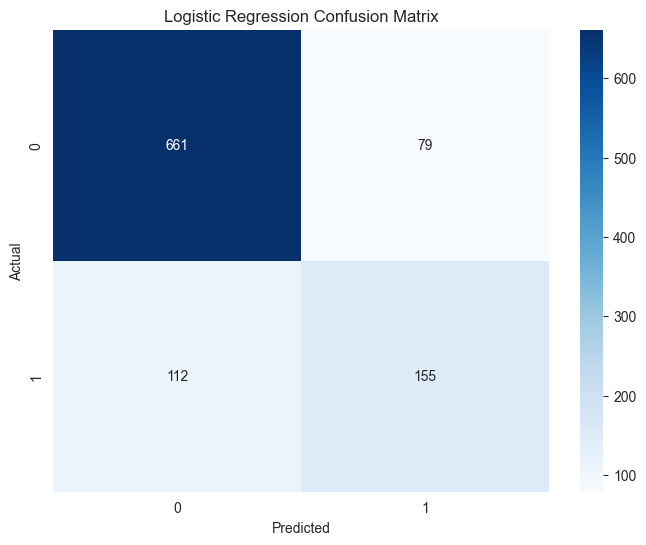

In [206]:
# Assuming rf_pred, dt_pred, and ada_pred are your predicted values for Random Forest, Decision Tree, and AdaBoost
rf_conf_matrix = confusion_matrix(y_eval, rf_pred)
dt_conf_matrix = confusion_matrix(y_eval, dt_pred)

# Assuming lr_pred and gb_pred are your predicted values for Logistic Regression and Gradient Boosting
lr_conf_matrix = confusion_matrix(y_eval, lr_pred)


# Define a function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(rf_conf_matrix, "Random Forest Confusion Matrix")

# Plot confusion matrix for Decision Tree
plot_confusion_matrix(dt_conf_matrix, "Decision Tree Confusion Matrix")



# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(lr_conf_matrix, "Logistic Regression Confusion Matrix")



This  visual represent of true positives, true negatives, false positives, and false negatives.
This give as a comprehensive understanding of how well our model is performing on unseen data.

#Cross Validation 

In [207]:
# Create a list of classifiers and their names
classifiers = [
    (RandomForestClassifier(), 'Random Forest'),
    (DecisionTreeClassifier(), 'Decision Tree'),
    (AdaBoostClassifier(), 'AdaBoost'),
    (LogisticRegression(), 'Logistic Regression'),
    (GradientBoostingClassifier(), 'Gradient Boosting')
]

# Create a cross-validation strategy (e.g., K-Fold with k=5)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop through each classifier and perform cross-validation
for clf, clf_name in classifiers:
    # Perform cross-validation and compute accuracy scores
    scores = cross_val_score(clf, final_X_train, y_train, cv=cv, scoring='accuracy')
    
    # Print the accuracy scores for each fold
    print(f"{clf_name} Cross-Validation Scores:", scores)
    print(f"{clf_name} Mean Accuracy:", scores.mean())
    print()

Random Forest Cross-Validation Scores: [0.76550868 0.79404467 0.78136646 0.77018634 0.78757764]
Random Forest Mean Accuracy: 0.779736756931708

Decision Tree Cross-Validation Scores: [0.69354839 0.73200993 0.73913043 0.7068323  0.72298137]
Decision Tree Mean Accuracy: 0.7189004824067938

AdaBoost Cross-Validation Scores: [0.77047146 0.79776675 0.81118012 0.81242236 0.80745342]
AdaBoost Mean Accuracy: 0.7998588228041245

Logistic Regression Cross-Validation Scores: [0.77915633 0.80397022 0.81118012 0.80496894 0.81490683]
Logistic Regression Mean Accuracy: 0.8028364902979209

Gradient Boosting Cross-Validation Scores: [0.76799007 0.80397022 0.80372671 0.80869565 0.80496894]
Gradient Boosting Mean Accuracy: 0.7978703204229151



## Hyperparameters Tuning

### Fine tune the top k models (3<k<5) using a GridsearchCV (that is in sklearn.model_selection) fo find the best hyperparameters and achieve the maximum performance of each of the top k models, then compare them again to select the best one.

In [208]:
print(len(trained_models))  # Print the length of the trained_models list

for model in trained_models:
    print(model)  # Print each model in the list

0


In [209]:
# Create an instance of LabelEncoder and fit it to the target variable y
le=LabelEncoder().fit(y)

## Hyperparameter Tuning of Gradient Boosting Classifier Model

In [210]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

In [211]:
# Define the hyperparameters and their possible values for DecisionTreeClassifier
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object with the DecisionTreeClassifier, parameter grid, and evaluation metrics
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, scoring=['accuracy', 'f1'], refit='f1', cv=5, verbose=3)

# Fit the GridSearchCV object to your training data
grid_search.fit(final_X_train, le.transform(y_train))

# Print the best hyperparameters and the corresponding scores
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])
print("Best F1 Score:", grid_search.cv_results_['mean_test_f1'][grid_search.best_index_])

# Get the best trained model
best_dt_model = grid_search.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2; accuracy: (test=0.793) f1: (test=0.492) total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2; accuracy: (test=0.799) f1: (test=0.515) total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2; accuracy: (test=0.784) f1: (test=0.470) total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2; accuracy: (test=0.761) f1: (test=0.543) total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2; accuracy: (test=0.781) f1: (test=0.514) total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5; accuracy: (test=0.793) f1: (test=0.492) total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5; accuracy: (test=0.799) f1: (test=0.515) total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_sample

In [212]:

# Define the hyperparameters and their possible values for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object with the RandomForestClassifier, parameter grid, and evaluation metrics
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring=['accuracy', 'f1'], refit='f1', cv=5, verbose=3)

# Fit the GridSearchCV object to your training data
grid_search.fit(final_X_train, le.transform(y_train))

# Print the best hyperparameters and the corresponding scores
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])
print("Best F1 Score:", grid_search.cv_results_['mean_test_f1'][grid_search.best_index_])

# Get the best trained model
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; accuracy: (test=0.793) f1: (test=0.557) total time=   1.3s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; accuracy: (test=0.754) f1: (test=0.450) total time=   1.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; accuracy: (test=0.781) f1: (test=0.534) total time=   1.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; accuracy: (test=0.780) f1: (test=0.554) total time=   1.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; accuracy: (test=0.779) f1: (test=0.562) total time=   1.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.794) f1: (test=0.561) total time=   2.1s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_

[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.785) f1: (test=0.564) total time=   7.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; accuracy: (test=0.776) f1: (test=0.563) total time=   4.3s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; accuracy: (test=0.797) f1: (test=0.566) total time=   4.6s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; accuracy: (test=0.759) f1: (test=0.467) total time=   4.1s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; accuracy: (test=0.784) f1: (test=0.549) total time=   3.7s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; accuracy: (test=0.783) f1: (test=0.561) total time=   3.6s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; accuracy: (test=0.788) f1: (te

In [213]:
# Define the hyperparameters and their possible values for AdaBoostClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0]
}

# Create an AdaBoostClassifier
ada_classifier = AdaBoostClassifier(random_state=42)

# Create a GridSearchCV object with the AdaBoostClassifier, parameter grid, and evaluation metrics
grid_search = GridSearchCV(estimator=ada_classifier, param_grid=param_grid, scoring=['accuracy', 'f1'], refit='f1', cv=5, verbose=3)

# Fit the GridSearchCV object to your training data
grid_search.fit(final_X_train, le.transform(y_train))

# Print the best hyperparameters and the corresponding scores
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])
print("Best F1 Score:", grid_search.cv_results_['mean_test_f1'][grid_search.best_index_])

# Get the best trained model
best_ada_model = grid_search.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[CV 1/5] END learning_rate=0.01, n_estimators=50; accuracy: (test=0.734) f1: (test=0.000) total time=   1.0s
[CV 2/5] END learning_rate=0.01, n_estimators=50; accuracy: (test=0.734) f1: (test=0.000) total time=   0.8s
[CV 3/5] END learning_rate=0.01, n_estimators=50; accuracy: (test=0.734) f1: (test=0.000) total time=   0.8s
[CV 4/5] END learning_rate=0.01, n_estimators=50; accuracy: (test=0.734) f1: (test=0.000) total time=   0.8s
[CV 5/5] END learning_rate=0.01, n_estimators=50; accuracy: (test=0.735) f1: (test=0.000) total time=   0.7s
[CV 1/5] END learning_rate=0.01, n_estimators=100; accuracy: (test=0.734) f1: (test=0.000) total time=   1.3s
[CV 2/5] END learning_rate=0.01, n_estimators=100; accuracy: (test=0.734) f1: (test=0.000) total time=   2.0s
[CV 3/5] END learning_rate=0.01, n_estimators=100; accuracy: (test=0.734) f1: (test=0.000) total time=   1.4s
[CV 4/5] END learning_rate=0.01, n_estimators=100; accuracy: (test=0.734) f1: (test=0.000) total time=   1.9s
[CV 5/5] END le

In [214]:
# Define the hyperparameters and their possible values for LogisticRegression
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'lbfgs']
}

# Create a LogisticRegression classifier
lr_classifier = LogisticRegression(random_state=42)

# Create a GridSearchCV object with the LogisticRegression classifier, parameter grid, and evaluation metrics
grid_search = GridSearchCV(estimator=lr_classifier, param_grid=param_grid, scoring=['accuracy', 'f1'], refit='f1', cv=5, verbose=3)

# Fit the GridSearchCV object to your training data
grid_search.fit(final_X_train, le.transform(y_train))

# Print the best hyperparameters and the corresponding scores
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])
print("Best F1 Score:", grid_search.cv_results_['mean_test_f1'][grid_search.best_index_])

# Get the best trained model
best_lr_model = grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END C=0.1, penalty=l1, solver=liblinear; accuracy: (test=0.792) f1: (test=0.546) total time=   0.0s
[CV 2/5] END C=0.1, penalty=l1, solver=liblinear; accuracy: (test=0.794) f1: (test=0.549) total time=   0.0s
[CV 3/5] END C=0.1, penalty=l1, solver=liblinear; accuracy: (test=0.796) f1: (test=0.566) total time=   0.0s


[CV 4/5] END C=0.1, penalty=l1, solver=liblinear; accuracy: (test=0.819) f1: (test=0.620) total time=   0.0s
[CV 5/5] END C=0.1, penalty=l1, solver=liblinear; accuracy: (test=0.795) f1: (test=0.591) total time=   0.0s
[CV 1/5] END C=0.1, penalty=l1, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 2/5] END C=0.1, penalty=l1, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 3/5] END C=0.1, penalty=l1, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 4/5] END C=0.1, penalty=l1, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 5/5] END C=0.1, penalty=l1, solver=lbfgs; accuracy: (test=nan) f1: (test=nan) total time=   0.0s
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear; accuracy: (test=0.798) f1: (test=0.565) total time=   0.0s
[CV 2/5] END C=0.1, penalty=l2, solver=liblinear; accuracy: (test=0.800) f1: (test=0.568) total time=   0.0s
[CV 3/5] END C=0.1, penalty=l2, solver=liblinear; accuracy

In [215]:

# Save the trained model to a file
joblib.dump(lr_model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [220]:
final_X_train.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,InternetService_No Internet Service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
581,1.444677,1.597538,2.457884,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1819,1.158312,-0.458791,0.416487,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
423,0.462853,-1.312268,-0.528117,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1491,-1.296247,-1.516902,-1.011043,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1143,0.708309,-1.490283,-0.604056,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [221]:
final_X_test.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.846245,0.642576,-0.550671,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.968973,-1.488619,-0.939221,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.232605,0.551073,-0.040277,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.232605,0.477870,-0.054443,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.296247,0.798964,-0.980234,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [217]:
# Load the saved model
loaded_lr_model = joblib.load('logistic_regression_model.pkl')

# Use the loaded model to make predictions
test_predictions_lr = best_lr_model.predict(final_X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- DeviceProtection_No
- DeviceProtection_No internet service
- DeviceProtection_Yes
- InternetService_No
- MultipleLines_No phone service
- ...
Feature names seen at fit time, yet now missing:
- InternetService_No Internet Service
- PhoneService_No
- PhoneService_Yes
- SeniorCitizen_No
- SeniorCitizen_Yes
